# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Constants 

NUM_POINTS = 100     # DEBUG 1500

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=NUM_POINTS)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=NUM_POINTS)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 80


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          #"Date": city_date
                          })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | road town
Processing Record 9 of Set 1 | zalantun
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | kodiak
Processing Record 14 of Set 1 | ahipara
Processing Record 15 of Set 1 | marsh harbour
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | asau
Processing Record 18 of Set 1 | menongue
Processing Record 19 of Set 1 | husavik
Processing Record 20 of Set 1 | hofn
Processing Record 21 of Set 1 | high level
Processing Record 22 of Set 1 | mahebourg
Processing Record 2

In [9]:
city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          #"Date": city_date
                          })
city_data

[{'City': 'busselton',
  'Lat': -33.65,
  'Lng': 115.3333,
  'Max Temp': 297.59,
  'Humidity': 55,
  'Cloudiness': 0,
  'Wind Speed': 5.52,
  'Country': 'AU'},
 {'City': 'mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 292.35,
  'Humidity': 57,
  'Cloudiness': 98,
  'Wind Speed': 5.13,
  'Country': 'NZ'},
 {'City': 'barrow',
  'Lat': 71.2906,
  'Lng': -156.7887,
  'Max Temp': 245.16,
  'Humidity': 76,
  'Cloudiness': 100,
  'Wind Speed': 2.57,
  'Country': 'US'},
 {'City': 'hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 299.79,
  'Humidity': 85,
  'Cloudiness': 75,
  'Wind Speed': 0,
  'Country': 'US'},
 {'City': 'new norfolk',
  'Lat': -42.7826,
  'Lng': 147.0587,
  'Max Temp': 295.21,
  'Humidity': 57,
  'Cloudiness': 49,
  'Wind Speed': 1.34,
  'Country': 'AU'},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 299.14,
  'Humidity': 76,
  'Cloudiness': 3,
  'Wind Speed': 6.83,
  'Country': 'PF'},
 {'City': 'porto novo',
  'Lat': 6.4965

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          75
Lat           75
Lng           75
Max Temp      75
Humidity      75
Cloudiness    75
Wind Speed    75
Country       75
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,busselton,-33.6500,115.3333,297.59,55,0,5.52,AU
1,mataura,-46.1927,168.8643,292.35,57,98,5.13,NZ
2,barrow,71.2906,-156.7887,245.16,76,100,2.57,US
3,hilo,19.7297,-155.0900,299.79,85,75,0.00,US
4,new norfolk,-42.7826,147.0587,295.21,57,49,1.34,AU


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("weatherpy_output/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("weatherpy_output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,busselton,-33.6500,115.3333,297.59,55,0,5.52,AU
1,mataura,-46.1927,168.8643,292.35,57,98,5.13,NZ
2,barrow,71.2906,-156.7887,245.16,76,100,2.57,US
3,hilo,19.7297,-155.0900,299.79,85,75,0.00,US
4,new norfolk,-42.7826,147.0587,295.21,57,49,1.34,AU


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

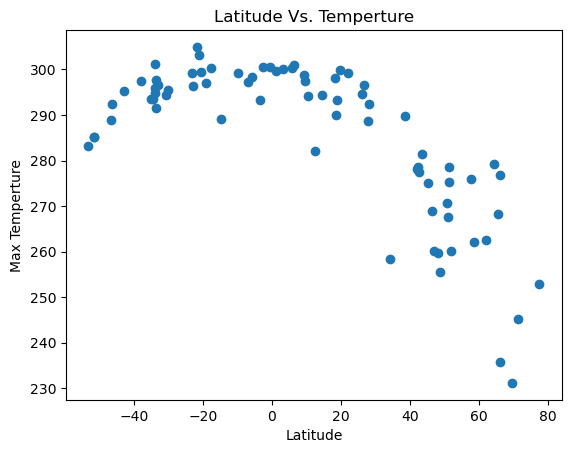

In [22]:
# Build scatter plot for latitude vs. temperature
#Lat_temp = city_data_df.plot.scatter()

plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Temperture")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture")

# Save the figure
plt.savefig("weatherpy_output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

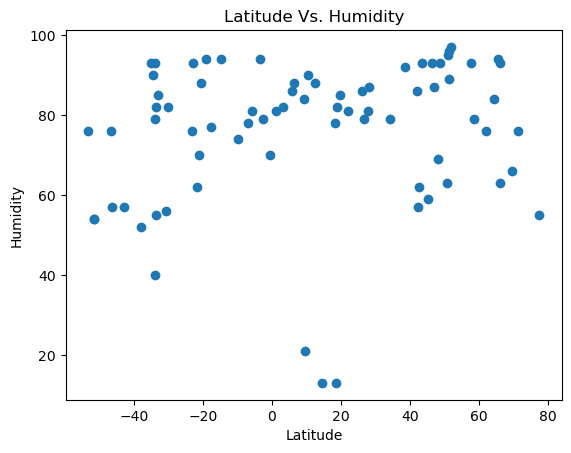

In [24]:
# Build the scatter plots for latitude vs. humidity
# 
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("weatherpy_output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

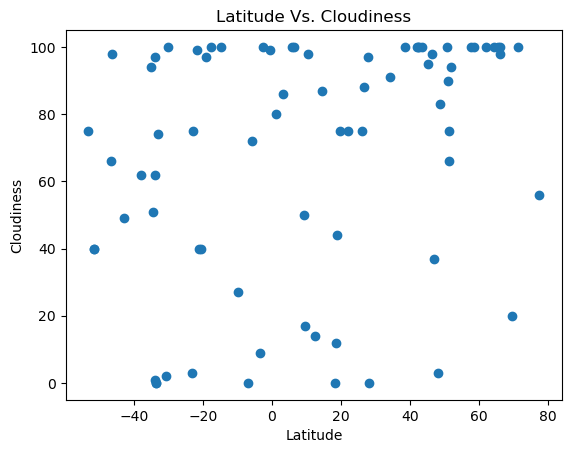

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("weatherpy_output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

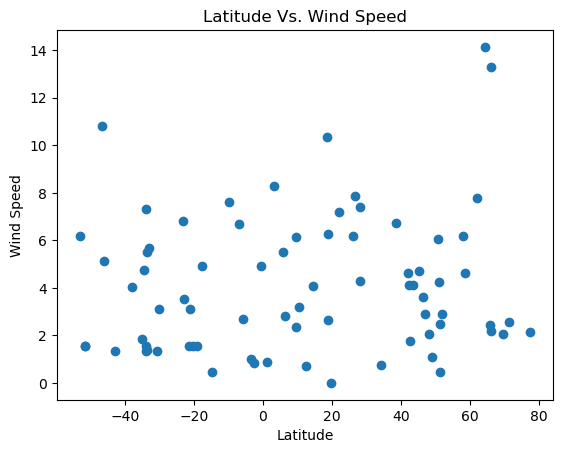

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Save the figure
plt.savefig("weatherpy_output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
import scipy.stats as st
#corr = st.pearsonr(city_data_df)

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hems = city_data_df.loc[city_data_df["Lat"]>= 0]

northern_hemi_df = pd.DataFrame(north_hems)


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
2,barrow,71.2906,-156.7887,245.16,76,100,2.57,US
3,hilo,19.7297,-155.0900,299.79,85,75,0.00,US
6,porto novo,6.4965,2.6036,301.05,88,100,2.81,BJ
7,road town,18.4167,-64.6167,298.20,78,0,10.33,VG
8,zalantun,48.0000,122.7167,259.66,69,3,2.06,CN


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hems = city_data_df.loc[city_data_df["Lat"]< 0]
southern_hemi_df = pd.DataFrame(south_hems)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,busselton,-33.6500,115.3333,297.59,55,0,5.52,AU
1,mataura,-46.1927,168.8643,292.35,57,98,5.13,NZ
4,new norfolk,-42.7826,147.0587,295.21,57,49,1.34,AU
5,rikitea,-23.1203,-134.9692,299.14,76,3,6.83,PF
9,cape town,-33.9258,18.4232,294.88,79,1,1.34,ZA


###  Temperature vs. Latitude Linear Regression Plot

In [45]:
# Linear regression on Northern Hemisphere
north_corr=st.pearsonr(northern_hemi_df['Max Temp'],northern_hemi_df['Lat'])
print("The r-value is:"+str(north_corr))
#temp_lat_r = 

The r-value is:PearsonRResult(statistic=-0.8386937843140332, pvalue=1.1896705356096451e-12)


In [47]:
# Linear regression on Southern Hemisphere
south_corr=st.pearsonr(southern_hemi_df['Max Temp'],southern_hemi_df['Lat'])
print("The r-value is:"+str(south_corr))

The r-value is:PearsonRResult(statistic=0.6323368250010855, pvalue=0.0001354452735027651)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

1. There is a stronger postive correlation between temperture in the sourthern hemisphere and the proximity to the ecuator than there is in the northern hemisphere. This is because the r value for the southern hemisphere is 0.6323368250010855, denoting a positive relationship, meaning the the closer you are to 0 Lat the higher the temperture. In contrast the r value for the northern hemisphere is -0.838693784314033, which is showing a negative relationship between proximity to the ecuator and high tempertures. 

### Humidity vs. Latitude Linear Regression Plot

<function matplotlib.pyplot.show(close=None, block=None)>

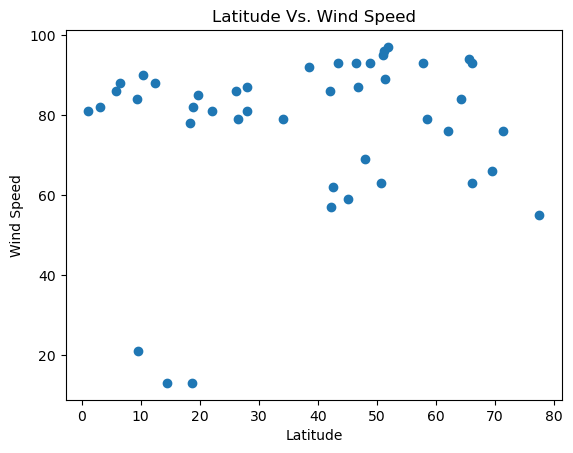

In [52]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.title("Humidity Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show


The r-value is: 0.0002808747046324607


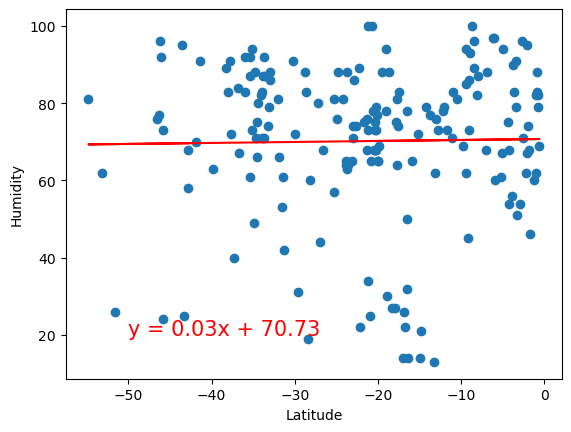

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.title("Humidity Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


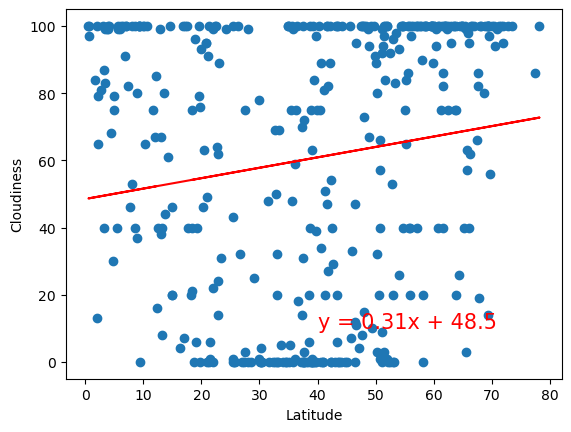

In [ ]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.title("Cloudiness Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show

The r-value is: 0.02056735429994368


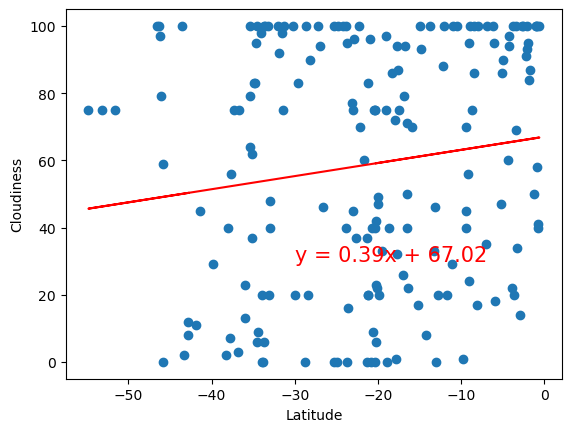

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.title("Cloudiness Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


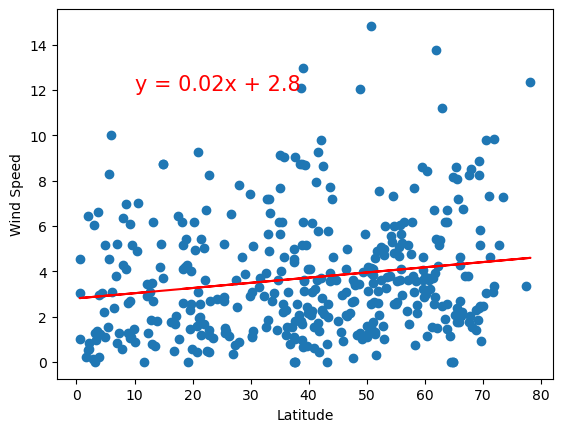

In [ ]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.title("Wind Speed Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show

The r-value is: 0.062239040700515696


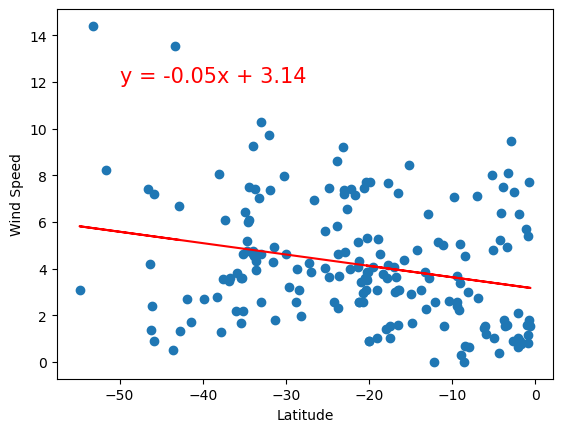

In [ ]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.title("Wind Speed Vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show

**Discussion about the linear relationship:** YOUR RESPONSE HERE